### Imports

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import numpy as np
import pandas as pd
import re
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS

np.set_printoptions(threshold=np.inf)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jabel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jabel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Lectura de Datos

In [ ]:
# Recogemos	los datos de la base de datos en un dataframe
df = pd.read_csv('../data/train.csv')

### Limpieza de texto

In [ ]:
# Función para limpiar el texto
def clean_text(text):
	
	# Estandarizamos caracteres extraños
	if(type(text) == str):
		text = text.replace('“', '"')
		text = text.replace('”', '"')
		text = text.replace('’', "'")
		text = text.replace('‘', "'")
		text = text.replace('`', "'")
		text = text.replace('´', "'")
		text = text.replace('–', '-')
		text = text.replace('−', '-')
		text = text.replace('…', '...')
		text = text.replace('—', '-')
		text = text.replace('•', '-')
		text = text.replace('·', '-')
	
	
    # Eliminar urls
	text = re.sub(r'http\S+', ' ', str(text))
	
 	# Eliminar emojis
	emoji_pattern = re.compile("["
			u"\U0001F600-\U0001F64F"
			u"\U0001F300-\U0001F5FF"
			u"\U0001F680-\U0001F6FF"
			u"\U0001F1E0-\U0001F1FF"
			u"\U00002702-\U000027B0"
			u"\U000024C2-\U0001F251"
			"]+", flags=re.UNICODE)
	text = emoji_pattern.sub(r'', text)
	
 	# Eliminar palabras con números
	text = re.sub(r'\w*\d\w*', ' ', text)
	
    # Eliminar palabras que no estén en latino
	text = re.sub(r'[^\x00-\x7F]+', ' ', str(text))
 
 	# Eliminar signos de puntuación
	text = re.sub(r'[^\w\s]', ' ', str(text))
 
	# Eliminar caracteres especiales
	text = re.sub(r'\W', ' ', str(text))
 
 	# Eliminar números
	#text = re.sub(r'\d+', ' ', text)
 
    # Minusculas
	text = text.lower()
 
 	# Eliminar contracciones
	
	text = re.sub(r"ain\'t", " am not", text)
	text = re.sub(r"aren\'t", " are not", text)
	text = re.sub(r"can\'t", " can not", text)
	text = re.sub(r"can\'t've", " can not have", text)
	text = re.sub(r"\'cause", " because	", text)
	text = re.sub(r"could\'ve", " could have", text)
	text = re.sub(r"couldn\'t", " could not", text)
	text = re.sub(r"couldn\'t've", " could not have", text)
	text = re.sub(r"didn\'t", " did not", text)
	text = re.sub(r"doesn\'t", " does not", text)
	text = re.sub(r"don\'t", " do not", text)
	text = re.sub(r"hadn\'t", " had not", text)
	text = re.sub(r"hadn\'t've", " had not have", text)
	text = re.sub(r"hasn\'t", " has not", text)
	text = re.sub(r"haven\'t", " have not", text)
	text = re.sub(r"he\'d", " he had", text)
	text = re.sub(r"he\'d've", " he would have", text)
	text = re.sub(r"he\'ll", " he will", text)
	text = re.sub(r"he\'ll've", " he will have", text)
	text = re.sub(r"he\'s", " he is", text)
	text = re.sub(r"how\'d", " how did", text)
	text = re.sub(r"how\'d'y", " how do you", text)
	text = re.sub(r"how\'ll", " how will", text)
	text = re.sub(r"how\'s", " how is", text)
	text = re.sub(r"how\'d", " how did", text)
	text = re.sub(r"i\'d", " i had", text)
	text = re.sub(r"i\'d've", " i would have", text)
	text = re.sub(r"i\'ll", " i will", text)
	text = re.sub(r"i\'ll've", " i will have", text)
	text = re.sub(r"i\'m", " i am", text)
	text = re.sub(r"i\'ve", " i have", text)
	text = re.sub(r"i\'ll", " i will", text)
	text = re.sub(r"isn\'t", " is not", text)
	text = re.sub(r"it\'d", " it had", text)
	text = re.sub(r"it\'d've", " it would have", text)
	text = re.sub(r"it\'ll", " it will", text)
	text = re.sub(r"it\'ll've", " it will have", text)
	text = re.sub(r"it\'s", " it is", text)
	text = re.sub(r"let\'s", " let us", text)
	text = re.sub(r"ma\'am", " madam", text)
	text = re.sub(r"mayn\'t", " may not", text)
	text = re.sub(r"might\'ve", " might have", text)
	text = re.sub(r"mightn\'t", " might not", text)
	text = re.sub(r"mightn\'t've", " might not have", text)
	text = re.sub(r"mightn\'t", " might not", text)
	text = re.sub(r"must\'ve", " must have", text)
	text = re.sub(r"mustn\'t", " must not", text)
	text = re.sub(r"mustn\'t've", " must not have", text)
	text = re.sub(r"needn\'t", " need not", text)
	text = re.sub(r"needn\'t've", " need not have", text)
	text = re.sub(r"o\'clock", " of the clock", text)
	text = re.sub(r"oughtn\'t", " ought not", text)
	text = re.sub(r"oughtn\'t've", " ought not have", text)
	text = re.sub(r"shan\'t", " shall not", text)
	text = re.sub(r"sha\'n't", " shall not", text)
	text = re.sub(r"shan\'t've", " shall not have", text)
	text = re.sub(r"she\'d", " she had", text)
	text = re.sub(r"she\'d've", " she would have", text)
	text = re.sub(r"she\'ll", " she will", text)
	text = re.sub(r"she\'ll've", " she will have", text)
	text = re.sub(r"she\'s", " she is", text)
	text = re.sub(r"should\'ve", " should have", text)
	text = re.sub(r"shouldn\'t", " should not", text)
	text = re.sub(r"shouldn\'t've", " should not have", text)
	text = re.sub(r"so\'ve", " so have", text)
	text = re.sub(r"so\'s", " so is", text)
	text = re.sub(r"that\'d", " that would", text)
	text = re.sub(r"that\'d've", " that would have", text)
	text = re.sub(r"that\'s", " that is", text)
	text = re.sub(r"there\'d", " there had", text)
	text = re.sub(r"there\'d've", " there would have", text)
	text = re.sub(r"there\'s", " there is", text)
	text = re.sub(r"they\'d", " they had", text)
	text = re.sub(r"they\'d've", " they would have", text)
	text = re.sub(r"they\'ll", " they will", text)
	text = re.sub(r"they\'ll've", " they will have", text)
	text = re.sub(r"they\'re", " they are", text)
	text = re.sub(r"they\'ve", " they have", text)
	text = re.sub(r"to\'ve", " to have", text)
	text = re.sub(r"wasn\'t", " was not", text)
	text = re.sub(r"we\'d", " we had", text)
	text = re.sub(r"we\'d\'ve", " we would have", text)
	text = re.sub(r"we\'ll", " we will", text)
	text = re.sub(r"we\'ll\'ve", " we will have", text)
	text = re.sub(r"we\'re", " we are", text)
	text = re.sub(r"we\'ve", " we have", text)
	text = re.sub(r"weren\'t", " were not", text)
	text = re.sub(r"what\'ll", " what will", text)
	text = re.sub(r"what\'ll\'ve", " what will have", text)
	text = re.sub(r"what\'re", " what are", text)
	text = re.sub(r"what\'s", " what is", text)
	text = re.sub(r"what\'ve", " what have", text)
	text = re.sub(r"when\'s", " when is", text)
	text = re.sub(r"when\'ve", " when have", text)
	text = re.sub(r"where\'d", " where did", text)
	text = re.sub(r"where\'s", " where is", text)
	text = re.sub(r"where\'ve", " where have", text)
	text = re.sub(r"who\'ll", " who will", text)
	text = re.sub(r"who\'ll\'ve", " who will have", text)
	text = re.sub(r"who\'s", " who is", text)
	text = re.sub(r"who\'ve", " who have", text)
	text = re.sub(r"why\'s", " why is", text)
	text = re.sub(r"why\'ve", " why have", text)
	text = re.sub(r"will\'ve", " will have", text)
	text = re.sub(r"won\'t", " will not", text)
	text = re.sub(r"won\'t\'ve", " will not have", text)
	text = re.sub(r"would\'ve", " would have", text)
	text = re.sub(r"wouldn\'t", " would not", text)
	text = re.sub(r"wouldn\'t\'ve", " would not have", text)
	text = re.sub(r"y\'all", " you all", text)
	text = re.sub(r"y\'all\'d\'ve", " you all would have", text)
	text = re.sub(r"y\'all\'d\'ve", " you all would have", text)
	text = re.sub(r"y\'all\'re", " you all are", text)
	text = re.sub(r"y\'all\'ve", " you all have", text)
	text = re.sub(r"you\'d\'ve", " you would have", text)
	text = re.sub(r"you\'ll", " you will", text)
	text = re.sub(r"you\'ll\'ve", " you will have", text)
	text = re.sub(r"you\'re", " you are", text)
	text = re.sub(r"you\'ve", " you have", text)
 
	# Eliminar espacios en blanco
	text = re.sub(r'\s{2,}', ' ', text)
 
	# Eliminar stopwords
	stop_words = set(stopwords.words('english'))
	text = text.split()
	text = [w for w in text if not w in stop_words]
	text = " ".join(text)
 
	# Stemming
	text = text.split()
	stemmer = SnowballStemmer('english')
	stemmed_words = [stemmer.stem(word) for word in text]
	text = " ".join(stemmed_words)
 	
	return text

In [ ]:
# Texto limpio en un nuevo dataframe
df_clean = pd.DataFrame()

df_clean['text'] = df['title'].apply(lambda x: clean_text(str(x))) + ' ' + df['text'].apply(lambda x: clean_text(str(x))) # Unimos título y texto
df_clean['label'] = df['label']

### Almacenamos las noticias limpias en un nuevo csv

In [ ]:
# Almacenamos las noticias limpias en un archivo csv para su posterior uso
df_clean.to_csv('../data/train_clean.csv', index=False)

### Recogemos los datos limpios

In [2]:
# Cargamos las noticias limpias en df_clean
df_clean = pd.read_csv('../data/train_clean.csv')

### Tokenización

In [3]:
# Tokenizamos el texto
df_clean_tokens = pd.DataFrame()
df_clean_tokens['text'] = df_clean['text'].apply(nltk.word_tokenize)
df_clean_tokens['label'] = df_clean['label']

### Split train/test

In [4]:
# Dividimos el dataset en train y test con la función sample de pandas
df_train, df_test = train_test_split(df_clean_tokens, test_size=0.2, random_state=777)

print("Ejemplos usados para entrenar: ", len(df_train))
print("Ejemplos usados para test: ", len(df_test))

Ejemplos usados para entrenar:  16640
Ejemplos usados para test:  4160


### Etiquetamos texto

In [5]:
# Si label es 0, incluimos en text True, False si es 1
for i in range(len(df_train['label'])):
	if df_train['label'].iloc[i] == 0:
		df_train['text'].iloc[i].append("TRUE")
	else:
		df_train['text'].iloc[i].append("FALSE")
  
df_train = df_train.drop('label', 1)

C:\Users\jabel\AppData\Local\Temp\ipykernel_6880\2436280572.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop('label', 1)


### Data Visualization

In [ ]:
# Creamos dos word cloud con el texto limpio y tokenizado de cada label
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				min_font_size = 10).generate(str(df_clean_tokens['text'][df_clean_tokens['label'] == 0]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				min_font_size = 10).generate(str(df_clean_tokens['text'][df_clean_tokens['label'] == 1]))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Enseñamos las palabras más frecuentes de cada label
def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
	words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
	return words_freq[:n]

In [ ]:
# Top 20 palabras más frecuentes de cada label
print('Palabras más frecuentes en noticias Verdaderas:')
common_words = get_top_n_words(df_clean['text'][df_clean_tokens['label'] == 0], 20)
for word, freq in common_words:
	print(word, freq)
print('-------------')
print('Palabras más frecuentes en noticias Falsas:')
common_words = get_top_n_words(df_clean['text'][df_clean_tokens['label'] == 1], 20)
for word, freq in common_words:
	print(word, freq)

In [ ]:
# Dividimos los datos en train y test
p_train = 0.80

df_clean_tokens['is_train'] = np.random.uniform(0, 1, len(df)) <= p_train
df_train = df_clean_tokens[df_clean_tokens['is_train'] == True]
df_test =  df_clean_tokens[df_clean_tokens['is_train'] == False]
df_clean_tokens = df_clean_tokens.drop('is_train', 1)
df_train = df_train.drop('is_train', 1)
df_test = df_test.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(df_train))
print("Ejemplos usados para test: ", len(df_test))

In [ ]:
df_train.head(10)

## Caso 1: Sin N-Gramas

In [ ]:
# Preparamos los datos para procesar Apriori
te1 = TransactionEncoder()
te_ary1 = te1.fit(df_train['text']).transform(df_train['text'])
df_apriori1 = pd.DataFrame(te_ary1, columns=te1.columns_)
df_apriori1

In [ ]:
# Conjuntos de items frecuentes
itemsets_frecuentes1 = apriori(df_apriori1, min_support=0.2, use_colnames=True)
itemsets_frecuentes1

In [ ]:
# Reglas de asociación apriori
reglas1 = association_rules(itemsets_frecuentes1, metric="confidence", min_threshold=0.2)
reglas1

In [ ]:
# Escogemos las reglas que contienen solamente True o solamente False en el consecuente
reglas_VoF1 = reglas1[(reglas1['consequents'] == frozenset({'TRUE'})) | (reglas1['consequents'] == frozenset({'FALSE'}))]
reglas_VoF1.sort_values(by=['confidence'], ascending=False)

In [ ]:
# Vemos la confianza maxima de las reglas falsas y verdaderas por separado
reglas_F1 = reglas1[reglas1['consequents'] == frozenset({'FALSE'})]
max(reglas_F1['confidence'])

reglas_V1 = reglas1[reglas1['consequents'] == frozenset({'TRUE'})]
max(reglas_V1['confidence'])

In [ ]:
# Vemos las 10 reglas que tienen mayor confianza de las falsas
reglas_F1.sort_values(by=['confidence'], ascending=False).head(10)

In [ ]:
# Vemos las 10 reglas que tienen mayor confianza de las verdaderas
reglas_V1.sort_values(by=['confidence'], ascending=False).head(10)

## Caso 2: Con N-Gramas

In [6]:
# Definimos get_grams
def get_ngrams(text, n):
	n_grams = ngrams(text, n)
	return [' '.join(grams) for grams in n_grams]

# Creamos un nuevo dataframe donde para cada noticia almacenamos los ngramas de 1 a 3 de longitud
df_train_ngramas = pd.DataFrame()
df_train_ngramas['text'] = df_train['text']
df_train_ngramas['ngrams'] = df_train_ngramas['text'].apply(lambda x: get_ngrams(x, 1)) + df_train_ngramas['text'].apply(lambda x: get_ngrams(x, 2)) + df_train_ngramas['text'].apply(lambda x: get_ngrams(x, 3))

df_test_ngramas = pd.DataFrame()
df_test_ngramas['text'] = df_test['text']
df_test_ngramas['label']	= df_test['label']
df_test_ngramas['ngrams'] = df_test_ngramas['text'].apply(lambda x: get_ngrams(x, 1)) + df_test_ngramas['text'].apply(lambda x: get_ngrams(x, 2)) + df_test_ngramas['text'].apply(lambda x: get_ngrams(x, 3))

# Descartamos los ngramas que incluyan las palabras 'TRUE' o 'FALSE'
df_train_ngramas['ngrams'] = df_train_ngramas['ngrams'].apply(lambda x: [ngram for ngram in x if 'TRUE' not in ngram and 'FALSE' not in ngram])
df_test_ngramas['ngrams'] = df_test_ngramas['ngrams'].apply(lambda x: [ngram for ngram in x if 'TRUE' not in ngram and 'FALSE' not in ngram])

In [7]:
# Pasamos de listas ngramas a sets de ngramas, así no los tendremos repetidos
for i in range(len(df_train_ngramas['ngrams'])):
	df_train_ngramas['ngrams'].iloc[i] = set(df_train_ngramas['ngrams'].iloc[i])
 
for i in range(len(df_test_ngramas['ngrams'])):
	df_test_ngramas['ngrams'].iloc[i] = set(df_test_ngramas['ngrams'].iloc[i])

C:\Users\jabel\AppData\Local\Temp\ipykernel_6880\681483402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ngramas['ngrams'].iloc[i] = set(df_test_ngramas['ngrams'].iloc[i])


In [8]:
# Creamos un set con todos los ngramas de train
ngramas = []
for i in range(len(df_train_ngramas['ngrams'])):
	ngramas += df_train_ngramas['ngrams'].iloc[i]
ngramas_set = set(ngramas)
len(ngramas_set)

In [11]:
# Contar la frecuencia de cada ngrama en el dataframe con counter
ngramas_counter = Counter(ngramas)

# Extraemos en una lista los ngramas que aparecen menos de 'umbral' veces
umbral = 50
ngramas_eliminar = [ngrama for ngrama, freq in ngramas_counter.items() if freq < umbral]

# Calculamos cuáles no vamos a eliminar, restando los conjuntos
ngramas_no_eliminar = set(ngramas) - set(ngramas_eliminar)

In [12]:
# Vemos el número total de ngramas en cada dataframe
print("Número total de ngramas en el dataframe original: ", len(ngramas_counter))
print("Número total de ngramas en el dataframe limpio: ", len(ngramas_no_eliminar))

Número total de ngramas en el dataframe original:  9057464
Número total de ngramas en el dataframe limpio:  14028


In [13]:
# Creamos un nuevo dataframe donde eliminamos los ngramas que aparecen menos de 'umbral' veces
df_train_ngramas_clean = pd.DataFrame()
df_train_ngramas_clean['text'] = df_train_ngramas['text']
df_train_ngramas_clean['ngrams'] = df_train_ngramas['ngrams'].apply(lambda x: set(x).intersection(ngramas_no_eliminar))

In [14]:
# Nos quedamos con los ngramas maximales, es decir los ngramas que no están contenidos en otros ngramas
ngramas_maximales = set(ngramas_no_eliminar)
for ngrama in ngramas_no_eliminar:
	for ngrama2 in ngramas_no_eliminar:
		if ngrama != ngrama2 and ngrama in ngrama2:
			ngramas_maximales.discard(ngrama)
   			break
  
print("Número total de ngramas maximales: ", len(ngramas_maximales))

Número total de ngramas maximales:  9790


In [16]:
# Creamos un set que contenga los bigramas incluidos en los ngramas maximales
bigramas_maximales = set()
for ngrama in ngramas_maximales:
	split = ngrama.split()
	if len(split) == 2:
		bigramas_maximales.add(ngrama)
	elif len(split) > 2:
		for i in range(len(split)-1):
			bigramas_maximales.add(split[i] + ' ' + split[i+1])

In [17]:
# Creamos una lista de transacciones donde cada transacción es una lista de elementos
transactions = df_train_ngramas_clean['text'].tolist()

# Creamos un TransactionEncoder y lo ajustamos a la lista de transacciones
te = TransactionEncoder()
te.fit(transactions)

# Transformamos las transacciones en una matriz booleana donde las filas representan las transacciones y las columnas representan los elementos
data = te.transform(transactions)

# Creamos un nuevo DataFrame a partir de la matriz booleana y las columnas de elementos correspondientes
df_encoded = pd.DataFrame(data, columns=te.columns_)

In [18]:
# Calculamos los itemsets frecuentes
freq_itemsets = apriori(df_encoded, min_support=0.25, use_colnames=True, verbose=1)
freq_itemsets

Processing 54 combinations | Sampling itemset size 6 53


,support,itemsets
0,0.504026,(FALSE)
1,0.495974,(TRUE)
2,0.304087,(accord)
3,0.269892,(ad)
4,0.538281,(also)
...,...,...
941,0.259014,"(new, said, would, one, time)"
942,0.259976,"(new, said, one, year, time)"
943,0.270613,"(york, new, said, one, time)"
944,0.254507,"(york, new, said, would, time)"


In [19]:
# Reglas de asociación
reglas = association_rules(freq_itemsets, metric="confidence", min_threshold=0.2)
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(one),(FALSE),0.617248,0.504026,0.261298,0.423328,0.839892,-0.049811,0.860062
1,(FALSE),(one),0.504026,0.617248,0.261298,0.518421,0.839892,-0.049811,0.794787
2,(TRUE),(also),0.495974,0.538281,0.331671,0.668727,1.242337,0.064697,1.393769
3,(also),(TRUE),0.538281,0.495974,0.331671,0.616166,1.242337,0.064697,1.313137
4,(call),(TRUE),0.413942,0.495974,0.252404,0.609756,1.229413,0.047099,1.291568
...,...,...,...,...,...,...,...,...,...
4801,(york),"(new, year, time, said)",0.388101,0.300361,0.255288,0.657789,2.189997,0.138718,2.044467
4802,(new),"(york, year, time, said)",0.584495,0.255409,0.255288,0.436767,1.710073,0.106003,1.321996
4803,(said),"(york, new, year, time)",0.620553,0.286058,0.255288,0.411389,1.438132,0.077775,1.212927
4804,(year),"(york, new, time, said)",0.539062,0.319171,0.255288,0.473579,1.483779,0.083236,1.293316


In [20]:
# Escogemos las reglas que contienen un elemento en el antecedente y otro en el consecuente, y ese elemento es un unigrama
reglas1 = reglas[	(reglas['antecedents'].apply(lambda x: len(x)) == 1) & (reglas['consequents'].apply(lambda x: len(x)) == 1)	& (reglas['antecedents'].apply(lambda x: ' ' not in list(x)[0]) & reglas['consequents'].apply(lambda x: ' ' not in list(x)[0]))   ]

In [21]:
reglas1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(one),(FALSE),0.617248,0.504026,0.261298,0.423328,0.839892,-0.049811,0.860062
1,(FALSE),(one),0.504026,0.617248,0.261298,0.518421,0.839892,-0.049811,0.794787
2,(TRUE),(also),0.495974,0.538281,0.331671,0.668727,1.242337,0.064697,1.393769
3,(also),(TRUE),0.538281,0.495974,0.331671,0.616166,1.242337,0.064697,1.313137
4,(call),(TRUE),0.413942,0.495974,0.252404,0.609756,1.229413,0.047099,1.291568
...,...,...,...,...,...,...,...,...,...
729,(year),(would),0.539062,0.544772,0.374639,0.694983,1.275733,0.080973,1.492470
730,(would),(york),0.544772,0.388101,0.292788,0.537452,1.384825,0.081362,1.322887
731,(york),(would),0.388101,0.544772,0.292788,0.754413,1.384825,0.081362,1.853635
732,(york),(year),0.388101,0.539062,0.294231,0.758129,1.406385,0.085020,1.905720


In [22]:
# Creamos una función que diga si una cadena de caracteres es un substring de un ngrama maximal
def is_in_maximal(cadena):
	return cadena in bigramas_maximales

In [23]:
# Escogemos las reglas cuyo antecedente y consecuente conjuntamente pertenecen a algun ngrama maximal
reglas2 = reglas1[	reglas1.apply(lambda x: is_in_maximal(list(x['antecedents'])[0] + ' ' + list(x['consequents'])[0]), axis=1)	]

In [24]:
reglas2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(said),(TRUE),0.620553,0.495974,0.414603,0.668119,1.347087,0.106826,1.518698
39,(year),(TRUE),0.539062,0.495974,0.322296,0.597882,1.205471,0.054935,1.253429
43,(also),(call),0.538281,0.413942,0.290625,0.539913,1.304319,0.067808,1.273797
45,(also),(come),0.538281,0.375361,0.255829,0.475271,1.266171,0.053780,1.190403
46,(could),(also),0.414303,0.538281,0.293810,0.709167,1.317466,0.070799,1.587576
...,...,...,...,...,...,...,...,...,...
721,(way),(would),0.368329,0.544772,0.266526,0.723609,1.328280,0.065871,1.647045
724,(would),(work),0.544772,0.395853,0.285036,0.523221,1.321755,0.069386,1.267142
726,(work),(year),0.395853,0.539062,0.286418,0.723546,1.342231,0.073029,1.667323
727,(year),(work),0.539062,0.395853,0.286418,0.531327,1.342231,0.073029,1.289057


In [25]:
# Definimos las palabras maximales como aquellas que se encuentran en los ngramas maximales
palabras_maximales = set()
for ngrama in ngramas_maximales:
	split = ngrama.split()
	for palabra in split:
		palabras_maximales.add(palabra)

In [26]:
# Escogemos las reglas que contienen solamente True o solamente False en el consecuente, y en el antecedente hay una palabra contenida en un ngrama maximal
reglas_V = reglas1[reglas1['consequents'] == frozenset({'TRUE'})]
reglas_V = reglas_V[reglas_V.apply(lambda x: list(x['antecedents'])[0] in palabras_maximales, axis=1)]
reglas_V.sort_values(by=['confidence'], ascending=False)
reglas_F = reglas1[reglas1['consequents'] == frozenset({'FALSE'})]
reglas_F = reglas_F[reglas_F.apply(lambda x: list(x['antecedents'])[0] in palabras_maximales, axis=1)]
reglas_F.sort_values(by=['confidence'], ascending=False)

# Agrupamos las reglas verdaderas y falsas en un solo dataframe
reglas_VoF = pd.DataFrame()
reglas_VoF = reglas_V.append(reglas_F)
reglas_VoF
reglas_VoF.sort_values(by=['confidence'], ascending=False)

C:\Users\jabel\AppData\Local\Temp\ipykernel_6880\1267194318.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reglas_VoF = reglas_V.append(reglas_F)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,(york),(TRUE),0.388101,0.495974,0.327524,0.843915,1.701531,0.135036,3.229169
27,(said),(TRUE),0.620553,0.495974,0.414603,0.668119,1.347087,0.106826,1.518698
12,(last),(TRUE),0.398137,0.495974,0.264123,0.663396,1.337564,0.066657,1.497388
19,(new),(TRUE),0.584495,0.495974,0.383954,0.656899,1.324464,0.094060,1.469032
25,(presid),(TRUE),0.423738,0.495974,0.268149,0.632818,1.275911,0.057986,1.372688
33,(time),(TRUE),0.623077,0.495974,0.384976,0.617863,1.245757,0.075946,1.318967
35,(two),(TRUE),0.416286,0.495974,0.257031,0.617439,1.244903,0.050564,1.317506
3,(also),(TRUE),0.538281,0.495974,0.331671,0.616166,1.242337,0.064697,1.313137
4,(call),(TRUE),0.413942,0.495974,0.252404,0.609756,1.229413,0.047099,1.291568
7,(could),(TRUE),0.414303,0.495974,0.251142,0.606179,1.222201,0.045659,1.279837


In [27]:
# Obtenemos una lista con los antecedentes de las reglas VoF
antecedentes_VoF = reglas_VoF['antecedents'].tolist()	

In [28]:
reglas_V

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(also),(TRUE),0.538281,0.495974,0.331671,0.616166,1.242337,0.064697,1.313137
4,(call),(TRUE),0.413942,0.495974,0.252404,0.609756,1.229413,0.047099,1.291568
7,(could),(TRUE),0.414303,0.495974,0.251142,0.606179,1.222201,0.045659,1.279837
9,(even),(TRUE),0.449399,0.495974,0.256550,0.570875,1.151018,0.033660,1.174543
10,(first),(TRUE),0.416046,0.495974,0.251803,0.605229,1.220285,0.045455,1.276756
12,(last),(TRUE),0.398137,0.495974,0.264123,0.663396,1.337564,0.066657,1.497388
15,(like),(TRUE),0.534014,0.495974,0.304988,0.571123,1.151519,0.040131,1.175224
16,(make),(TRUE),0.450962,0.495974,0.259736,0.575959,1.161271,0.036071,1.188628
19,(new),(TRUE),0.584495,0.495974,0.383954,0.656899,1.324464,0.094060,1.469032
21,(one),(TRUE),0.617248,0.495974,0.355950,0.576672,1.162708,0.049811,1.190629


In [29]:
# Creamos una función que vea si hay una regla en reglas2 con el antecedente y consecuente que le pasamos
def is_in_reglas2(antecedente, consecuente):
	return (antecedente, consecuente) in reglas2.apply(lambda x: (list(x['antecedents'])[0], list(x['consequents'])[0]), axis=1).tolist()

In [31]:
# Escogemos las palabras conectadas con True o False
palabras_conectadas = set()
nuevas = set([list(x)[0] for x in reglas_VoF['antecedents']])
while len(nuevas) > 0:
    palabras_conectadas_aux = nuevas.copy()
    nuevas = set()
    for ant in palabras_conectadas_aux:
        nuevas.update(set(reglas2[reglas2.apply(lambda x: list(x['consequents'])[0] == ant, axis=1)]['antecedents'].apply(lambda x: list(x)[0]).tolist()))
    nuevas.difference_update(palabras_conectadas)
    palabras_conectadas.update(nuevas)

In [32]:
palabras_conectadas

{'also',
 'american',
 'back',
 'call',
 'come',
 'could',
 'countri',
 'day',
 'donald',
 'even',
 'first',
 'get',
 'go',
 'includ',
 'know',
 'last',
 'like',
 'make',
 'mani',
 'much',
 'nation',
 'need',
 'new',
 'one',
 'part',
 'peopl',
 'presid',
 'report',
 'right',
 'said',
 'say',
 'see',
 'show',
 'state',
 'take',
 'think',
 'time',
 'trump',
 'two',
 'unit',
 'use',
 'want',
 'way',
 'well',
 'work',
 'world',
 'would',
 'year',
 'york'}

In [33]:
# Nos quedamos con las reglas donde tanto el antecedente como el consecuente son palabras conectadas
reglas3 = reglas2[reglas2.apply(lambda x: list(x['antecedents'])[0] in palabras_conectadas and list(x['consequents'])[0] in palabras_conectadas, axis=1)]

In [48]:
# Eliminamos las reglas que forman ciclos al crear una red con las reglas3
G = nx.DiGraph()
	

In [34]:
len(reglas3)

345

In [ ]:
max(reglas_V['confidence'])

In [ ]:
# Vemos las 10 reglas que tienen mayor confianza de las verdaderas
reglas_V.sort_values(by=['confidence'], ascending=False).head(10)

In [ ]:
len(reglas_F)

In [ ]:
max(reglas_F['confidence'])

In [ ]:
# Vemos las 10 reglas que tienen mayor confianza de las falsas
reglas_F.sort_values(by=['confidence'], ascending=False).head(10)

In [ ]:
min(reglas_F['support'])

### Grafo de Asociación

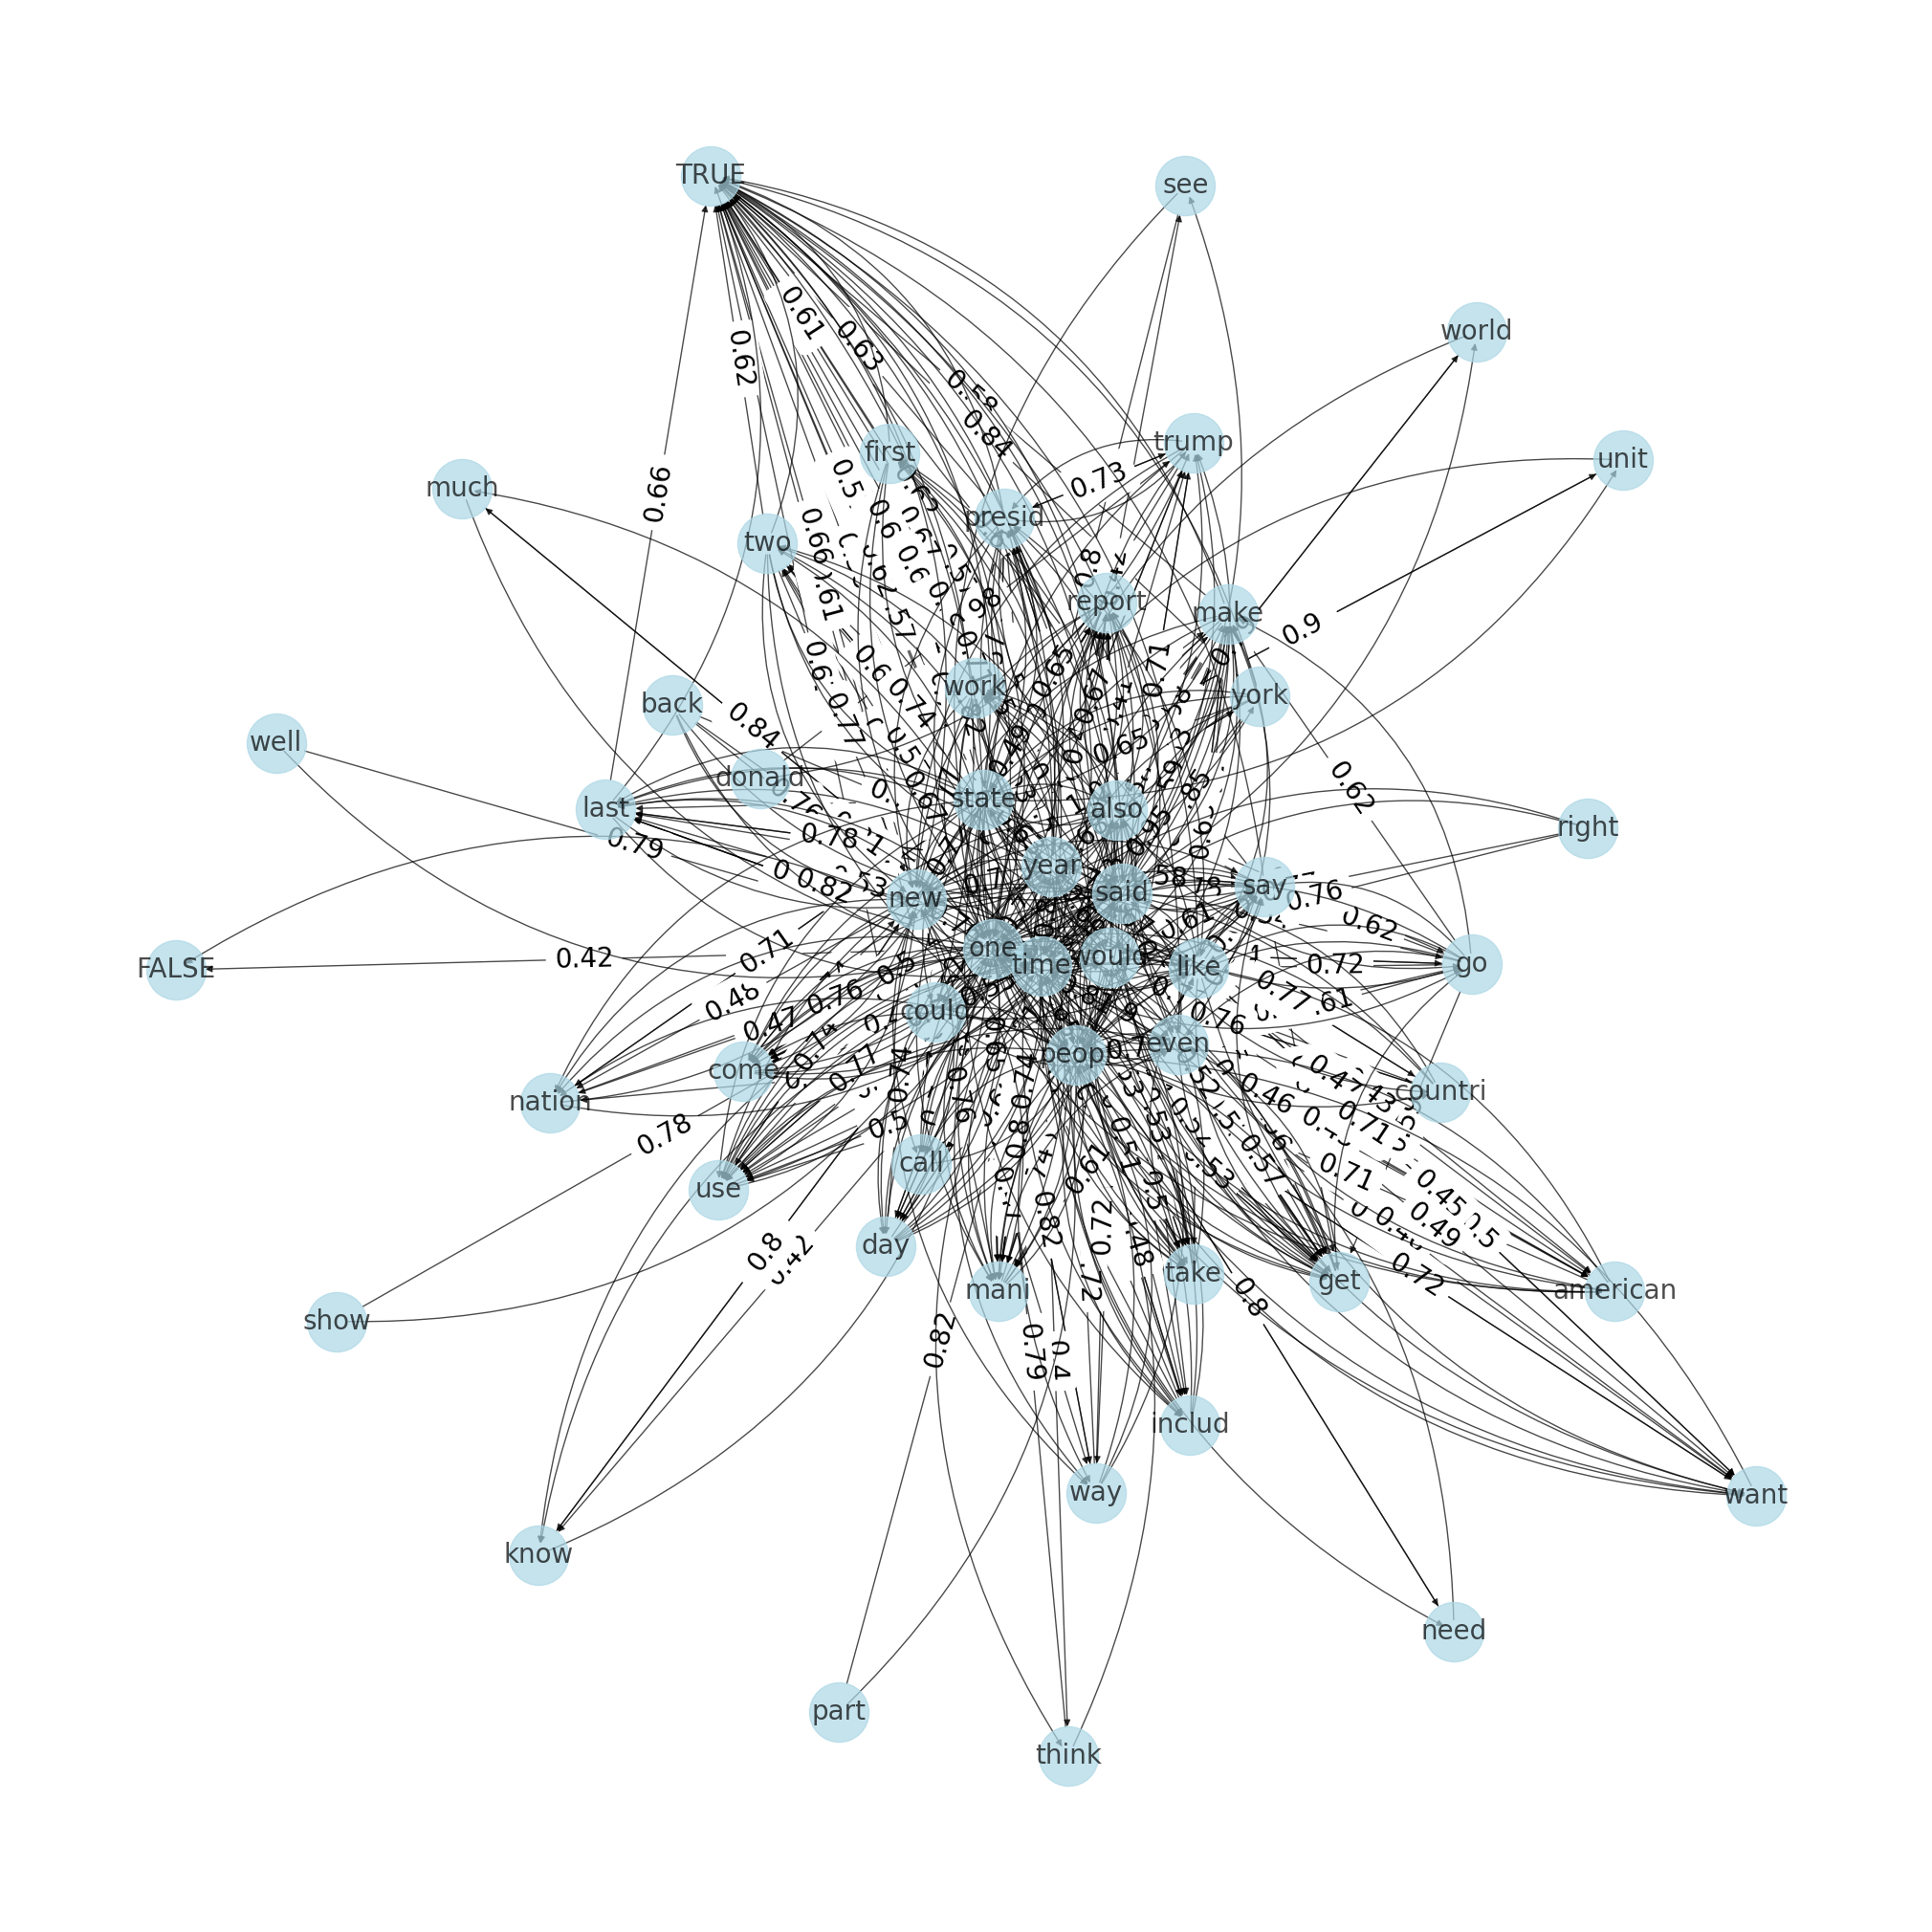

In [47]:
# Seleccionamos las reglas que tienen una confianza mayor a 0.4
reglas_VoF_grafo = reglas_VoF[reglas_VoF['confidence'] > 0.4]
reglas_VoF_grafo = reglas_VoF_grafo.head(100)

# Creamos un grafo de las reglas, donde los nodos son los elementos y las aristas son las reglas, y el valor de la arista es la confianza
G = nx.DiGraph()

# Añadimos los nodos
for i in range(len(reglas3)):
	G.add_node(next(iter(reglas3['antecedents'].iloc[i])))
	G.add_node(next(iter(reglas3['consequents'].iloc[i])))

for i in range(len(reglas_VoF_grafo)):
	G.add_node(next(iter(reglas_VoF_grafo['antecedents'].iloc[i])))
	G.add_node(next(iter(reglas_VoF_grafo['consequents'].iloc[i])))
	
# Añadimos las aristas con la confianza como peso
for i in range(len(reglas3)):
	G.add_edge(next(iter(reglas3['antecedents'].iloc[i])), next(iter(reglas3['consequents'].iloc[i])), weight=reglas3['confidence'].iloc[i].round(2))

for i in range(len(reglas_VoF_grafo)):
	G.add_edge(next(iter(reglas_VoF_grafo['antecedents'].iloc[i])), next(iter(reglas_VoF_grafo['consequents'].iloc[i])), weight=reglas_VoF_grafo['confidence'].iloc[i].round(2))

# Dibujamos el grafo
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, font_size=20, node_size=2000, node_color='lightblue', edge_color='black', width=1, alpha=0.7)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', arrows=True, width=1, alpha=0.7, connectionstyle='arc3, rad=0.3')
plt.show()

In [51]:
# Comprobamos si el grafo tiene ciclos
nx.is_directed_acyclic_graph(G)

False

### Calculo de Pesos de las Reglas

In [ ]:
df_test_ngrams.columns

In [ ]:
# Calculamos los pesos de las reglas mediante la confianza y de forma no lineal, para que las reglas con confianza alta tengan un peso mayor, las que tienen confianza 0.5 tengan peso nulo y las que tienen confianza baja tengan un peso negativo
reglas_VoF['peso'] = reglas_VoF['confidence'].apply(lambda x: (x - 0.5)**2)

# Calculamos los ngramas del conjunto test
df_test_ngrams_clean = pd.DataFrame()
df_test_ngrams_clean['text'] = df_test_ngrams['text']
df_test_ngrams_clean['label'] = df_test_ngrams['label']
df_test_ngrams_clean['ngrams'] = df_test_ngrams['ngrams'].apply(lambda x: set(x).intersection(ngramas_no_eliminar))

# Ahora que tenemos las reglas y los ngramas del conjunto test, vamos a clasificar cada noticia test según si cumplen o no las reglas y sumando los pesos de las reglas que se cumplen con votación positiva
df_test_ngrams_clean['votos'] = df_test_ngrams_clean['ngrams'].apply(lambda x: sum(reglas_VoF[reglas_VoF['antecedents'].isin(x)]['peso']))

In [ ]:
# Cambiamos False y True por 1 y 0
df_test_ngrams_clean['label'] = df_test_ngrams_clean['label'].apply(lambda x: 1 if x == True else 0)

In [ ]:
# Calculamos la predicción de cada noticia test
df_test_ngrams_clean['prediccion'] = df_test_ngrams_clean['votos'].apply(lambda x: 0 if x > 0 else 1)

# Calculamos la precisión
accuracy_score(df_test_ngrams_clean['label'], df_test_ngrams_clean['prediccion'])


In [ ]:
# Calculamos la matriz de confusión
confusion_matrix(df_test_ngrams_clean['label'], df_test_ngrams_clean['prediccion'])